In [37]:

import pandas as pd
import numpy as np
import wfdb
import os
data_files = []
# set working directory first
wd = os.getcwd()
participant = '001'
path = wd + "/patient" + participant
filename = [i for i in os.listdir(path) if ".dat" in i][0]
file = path + '/' + filename

# get signal
data = pd.DataFrame()
for i in range(15):
    signal_name = wfdb.rdsamp(record_name=file[:-4])[1]['sig_name'][i]
    signal = wfdb.rdsamp(record_name=file[:-4])[0][:, i]
    channel = pd.DataFrame({str(signal_name): wfdb.rdsamp(record_name=file[:-4])[0][:, 0]})
    data = pd.concat([data, channel], axis=1)

data["Participant"] = participant
data["Sample"] = range(len(data))
data["Sampling_Rate"] = 1000
data["Database"] = "PTB-Diagnostic-ECG-Database-1.0.0"
data["Sex"] = wfdb.rdsamp(file[:-4])[1]['comments'][1]
data["Age"] = wfdb.rdsamp(file[:-4])[1]['comments'][0]
# can add more descriptive columns from the data

# append
data_files.append(data)

# Tidy final output
df = pd.concat(data_files)

In [38]:
df

,i,ii,iii,avr,avl,avf,v1,v2,v3,v4,...,v6,vx,vy,vz,Participant,Sample,Sampling_Rate,Database,Sex,Age
0,-0.2445,-0.2445,-0.2445,-0.2445,-0.2445,-0.2445,-0.2445,-0.2445,-0.2445,-0.2445,...,-0.2445,-0.2445,-0.2445,-0.2445,001,0,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
1,-0.2425,-0.2425,-0.2425,-0.2425,-0.2425,-0.2425,-0.2425,-0.2425,-0.2425,-0.2425,...,-0.2425,-0.2425,-0.2425,-0.2425,001,1,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
2,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,-0.2415,...,-0.2415,-0.2415,-0.2415,-0.2415,001,2,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
3,-0.2410,-0.2410,-0.2410,-0.2410,-0.2410,-0.2410,-0.2410,-0.2410,-0.2410,-0.2410,...,-0.2410,-0.2410,-0.2410,-0.2410,001,3,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
4,-0.2315,-0.2315,-0.2315,-0.2315,-0.2315,-0.2315,-0.2315,-0.2315,-0.2315,-0.2315,...,-0.2315,-0.2315,-0.2315,-0.2315,001,4,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
38395,0.1395,0.1395,0.1395,0.1395,0.1395,0.1395,0.1395,0.1395,0.1395,0.1395,...,0.1395,0.1395,0.1395,0.1395,001,38395,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
38396,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,0.1500,...,0.1500,0.1500,0.1500,0.1500,001,38396,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
38397,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,0.1520,...,0.1520,0.1520,0.1520,0.1520,001,38397,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81
38398,0.1360,0.1360,0.1360,0.1360,0.1360,0.1360,0.1360,0.1360,0.1360,0.1360,...,0.1360,0.1360,0.1360,0.1360,001,38398,1000,PTB-Diagnostic-ECG-Database-1.0.0,sex: female,age: 81


In [39]:
import wfdb
import neurokit2 as nk
import pandas as pd
cleaned_ecg = nk.ecg_clean(df['i'], sampling_rate=df['Sampling_Rate'][0])

In [40]:
cleaned_ecg

array([-0.03831077, -0.03717505, -0.03604557, ...,  0.04876089,
        0.04576523,  0.04283721])

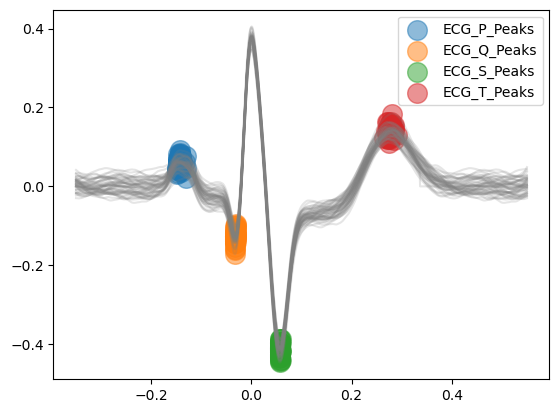

In [41]:
_, rpeaks = nk.ecg_peaks(cleaned_ecg, sampling_rate=df['Sampling_Rate'][0])

# Delineate the ECG signal
_, waves = nk.ecg_delineate(cleaned_ecg, rpeaks, sampling_rate=df['Sampling_Rate'][0], method="peak", show=True)

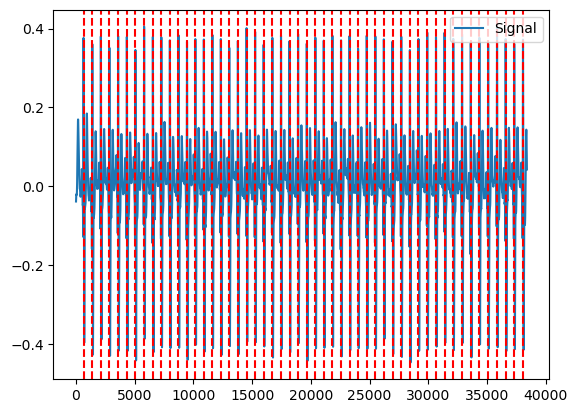

In [42]:
plot = nk.events_plot(rpeaks['ECG_R_Peaks'][:], cleaned_ecg[:], color='red')

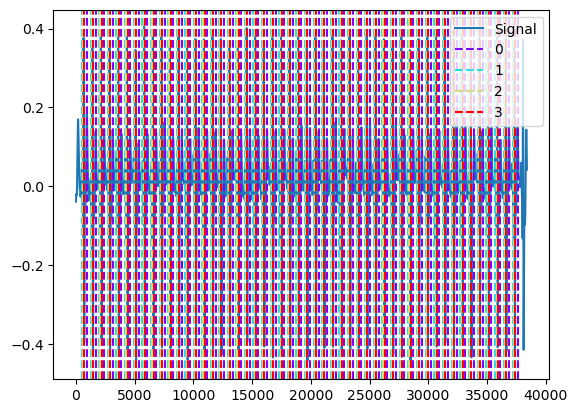

In [43]:
plot = nk.events_plot([waves['ECG_T_Peaks'], waves['ECG_P_Peaks'], waves['ECG_Q_Peaks'], waves['ECG_S_Peaks']], cleaned_ecg)

In [44]:
waves['ECG_P_Peaks']

[494,
 1256,
 1975,
 2710,
 3444,
 4181,
 4917,
 5654,
 6394,
 7119,
 7846,
 8582,
 9306,
 10020,
 10738,
 11465,
 12189,
 12905,
 13637,
 14381,
 15106,
 15833,
 16574,
 17312,
 18035,
 18771,
 19505,
 20234,
 20953,
 21685,
 22421,
 23151,
 23887,
 24615,
 25347,
 26069,
 26806,
 27555,
 28284,
 29020,
 29769,
 30515,
 31241,
 31983,
 32736,
 33470,
 34206,
 34956,
 35722,
 36443,
 37172,
 nan]

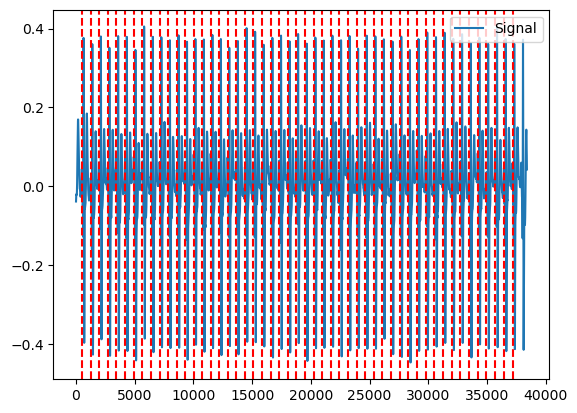

In [45]:
plot = nk.events_plot(waves['ECG_P_Peaks'], cleaned_ecg, color='red')